Importar datos y librerias necesiarias

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import seaborn as sns

file_name = r"C:\Users\Stefania Alvarez\Documents\Universidad\2025-1\Analitica\Proyecto-1_Grupo\Datos Iniciales.xlsx"

df = pd.read_excel(file_name)

print(df.head())

           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

Category

In [5]:
category = [i for i in df['category'] if False == pd.isna(i)]
conteo_category = []

for i in category:
    conteo_category.append(i.split('/')[-1])

ste=0
a=0
h=0
for i in conteo_category:
    if i=="short_term":
       ste+=1
    elif i=="apartment":
        a+=1
    else:
        h+=1   

print("Número de inmuebles de tipo short-term: ", ste)
print("Número de inmuebles de tipo apartment: ", a)
print("Número de inmuebles de tipo home: ", h)

Número de inmuebles de tipo short-term:  2
Número de inmuebles de tipo apartment:  9996
Número de inmuebles de tipo home:  2


Amenities

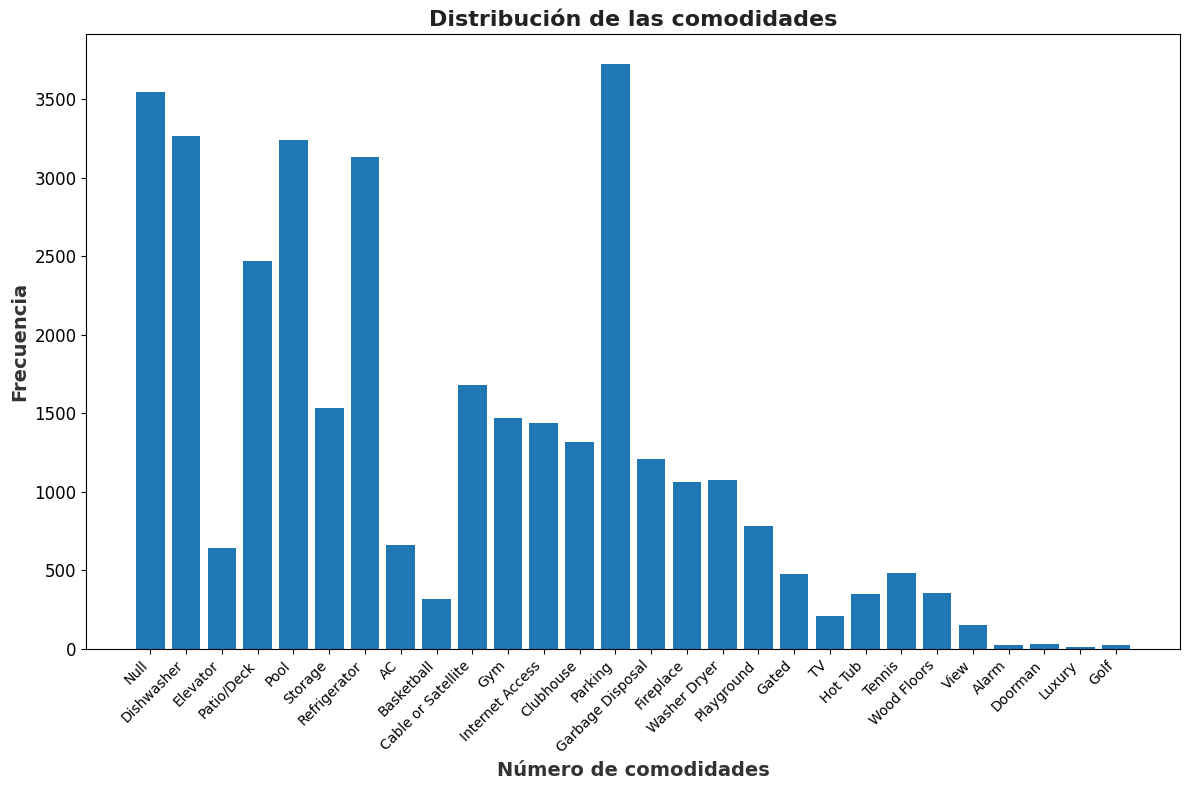

In [6]:
amenities_cat = df['amenities'].str.split(',').explode().str.strip().drop_duplicates().tolist()
amenities_dic = {}
amenities_dic["Null"] = df['amenities'].isnull().sum()

amenities = [i for i in df['amenities'] if False == pd.isna(i)]

for j in amenities_cat[1:]:
    count =0
    for i in amenities:
        if j in i.split(','):
            count+=1
    amenities_dic[j] = count
    
#Histograma
plt.figure(figsize=(12, 8))
plt.bar(list(amenities_dic.keys()), list(amenities_dic.values()))
plt.xlabel('Número de comodidades', fontsize=14, fontweight='bold', color="#333333")
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold', color="#333333")
plt.title('Distribución de las comodidades', fontsize=16, fontweight='bold', color="#222222")
plt.xticks( rotation=45,ha='right',fontsize=10) 
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
    

Bathrooms

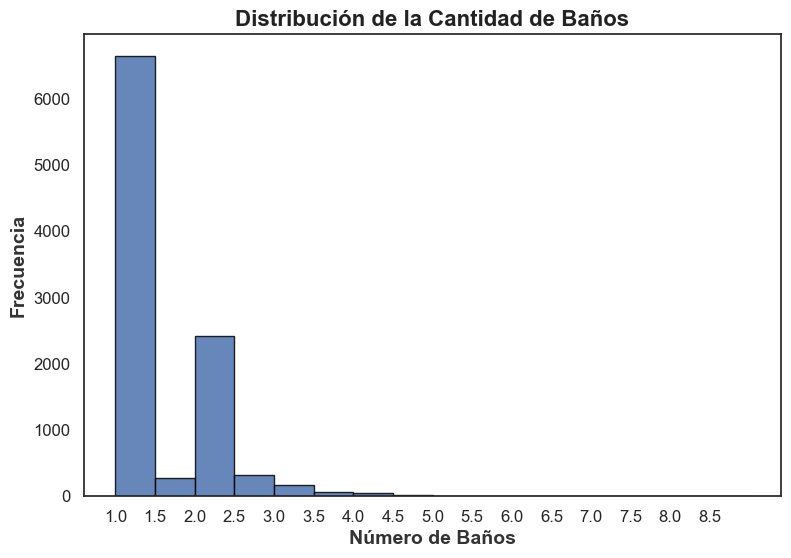

C:\Users\Stefania Alvarez\AppData\Local\Temp\ipykernel_1248\2709990899.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12, loc="upper right")


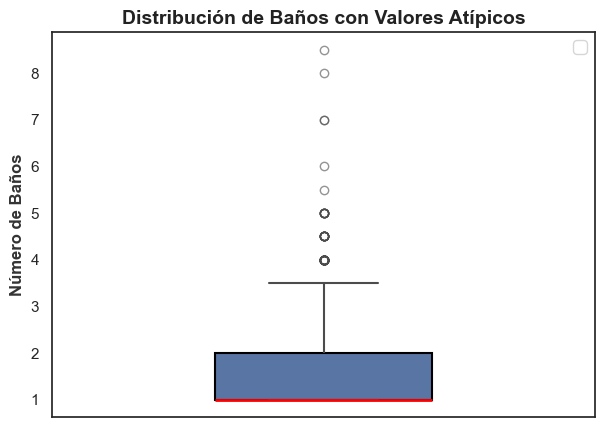

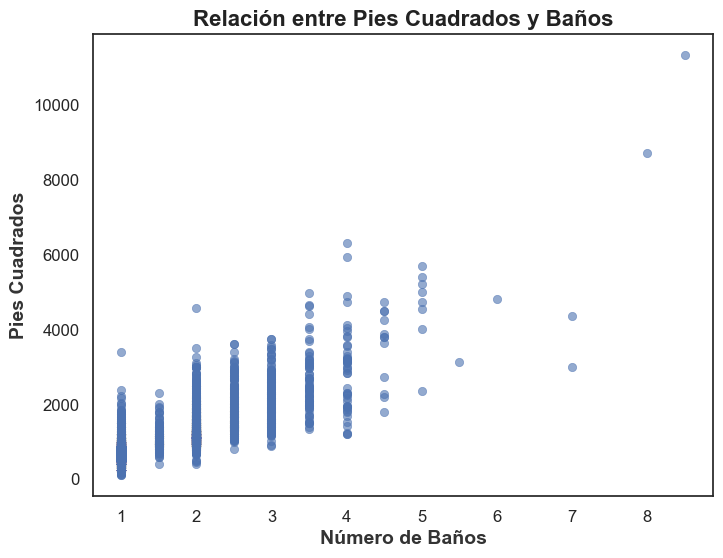

In [8]:
#Histograma
plt.figure(figsize=(9, 6))
bins = np.arange(1, 9.5, 0.5)
plt.hist(df['bathrooms'], bins=bins, edgecolor='black', color="#4C72B0", alpha=0.85, rwidth=1)
plt.xlabel('Número de Baños', fontsize=14, fontweight='bold', color="#333333")
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold', color="#333333")
plt.title('Distribución de la Cantidad de Baños', fontsize=16, fontweight='bold', color="#222222")
plt.xticks(np.arange(1, 9, 0.5), fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

#BoxPlot
plt.figure(figsize=(7, 5))  
sns.set(style="white")  
sns.boxplot(y=df['bathrooms'], width=0.4, color="#4C72B0", 
            boxprops={'edgecolor': 'black', 'linewidth': 1.5},  
            medianprops={'color': 'red', 'linewidth': 2},  
            whiskerprops={'linewidth': 1.5},  
            capprops={'linewidth': 1.5},  
            flierprops={'marker': 'o', 'color': 'red', 'alpha': 0.6}) 

plt.ylabel('Número de Baños', fontsize=12, fontweight='bold', color="#333333")
plt.title('Distribución de Baños con Valores Atípicos', fontsize=14, fontweight='bold', color="#222222")
plt.legend(fontsize=12, loc="upper right")
plt.show()

#Diagrama de dispersion con metros cuadrados
plt.figure(figsize=(8, 6))
plt.scatter(df['bathrooms'], df['square_feet'], alpha=0.6, color="#4C72B0", linewidth=0.5)

plt.xlabel('Número de Baños', fontsize=14, fontweight='bold', color="#333333")
plt.ylabel('Pies Cuadrados', fontsize=14, fontweight='bold', color="#333333")
plt.title('Relación entre Pies Cuadrados y Baños', fontsize=16, fontweight='bold', color="#222222")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Bedrooms

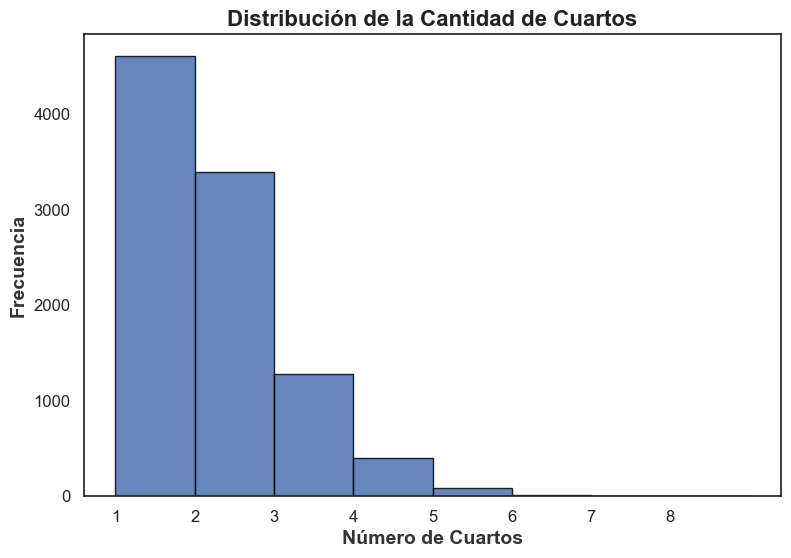

C:\Users\Stefania Alvarez\AppData\Local\Temp\ipykernel_1248\1808347207.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12, loc="upper right")


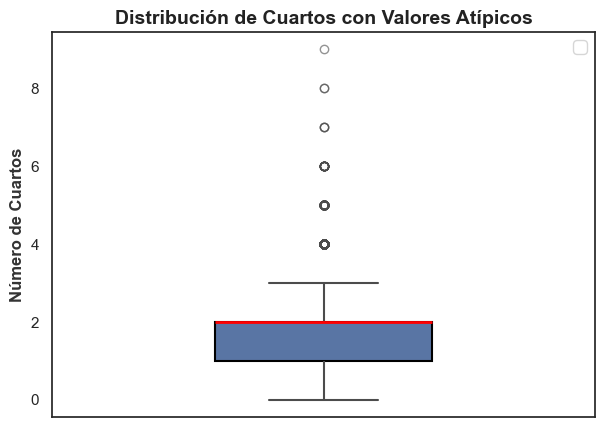

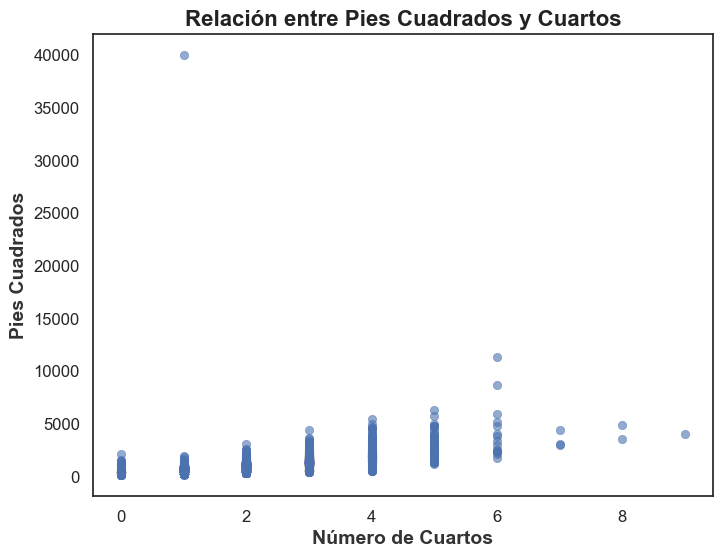

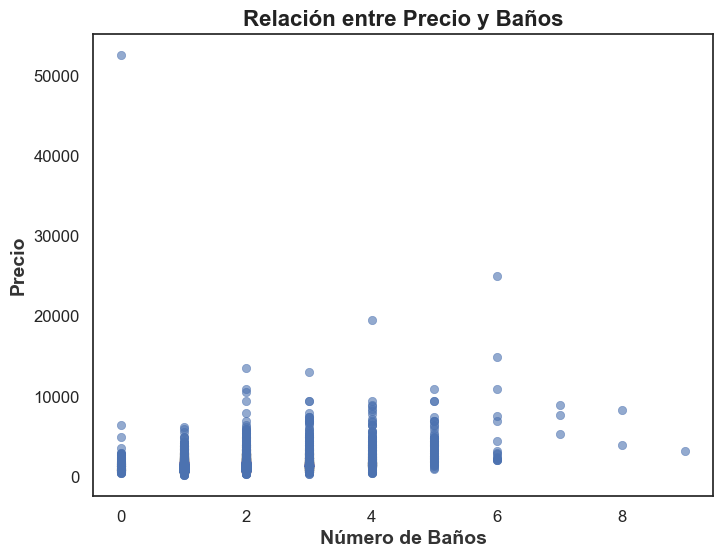

In [10]:
#Histograma
plt.figure(figsize=(9, 6))
bins = np.arange(1, 9.5, 1)
plt.hist(df['bedrooms'], bins=bins, edgecolor='black', color="#4C72B0", alpha=0.85, rwidth=1)
plt.xlabel('Número de Cuartos', fontsize=14, fontweight='bold', color="#333333")
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold', color="#333333")
plt.title('Distribución de la Cantidad de Cuartos', fontsize=16, fontweight='bold', color="#222222")
plt.xticks(np.arange(1, 9, 1), fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

#BoxPlot
plt.figure(figsize=(7, 5))  
sns.set(style="white")  
sns.boxplot(y=df['bedrooms'], width=0.4, color="#4C72B0", 
            boxprops={'edgecolor': 'black', 'linewidth': 1.5},  
            medianprops={'color': 'red', 'linewidth': 2},  
            whiskerprops={'linewidth': 1.5},  
            capprops={'linewidth': 1.5},  
            flierprops={'marker': 'o', 'color': 'red', 'alpha': 0.6}) 

plt.ylabel('Número de Cuartos', fontsize=12, fontweight='bold', color="#333333")
plt.title('Distribución de Cuartos con Valores Atípicos', fontsize=14, fontweight='bold', color="#222222")
plt.legend(fontsize=12, loc="upper right")
plt.show()

#Diagrama de dispersion con metros cuadrados
plt.figure(figsize=(8, 6))
plt.scatter(df['bedrooms'], df['square_feet'], alpha=0.6, color="#4C72B0", linewidth=0.5)

plt.xlabel('Número de Cuartos', fontsize=14, fontweight='bold', color="#333333")
plt.ylabel('Pies Cuadrados', fontsize=14, fontweight='bold', color="#333333")
plt.title('Relación entre Pies Cuadrados y Cuartos', fontsize=16, fontweight='bold', color="#222222")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Diagrama de dispersion con cuartos
plt.figure(figsize=(8, 6))
plt.scatter(df['bedrooms'], df['price'], alpha=0.6, color="#4C72B0", linewidth=0.5)

plt.xlabel('Número de Baños', fontsize=14, fontweight='bold', color="#333333")
plt.ylabel('Precio', fontsize=14, fontweight='bold', color="#333333")
plt.title('Relación entre Precio y Baños', fontsize=16, fontweight='bold', color="#222222")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Pets

In [12]:
pets = df['pets_allowed']
print("Número de valores nulos: ", pets.isnull().sum())


Número de valores nulos:  4163


Price

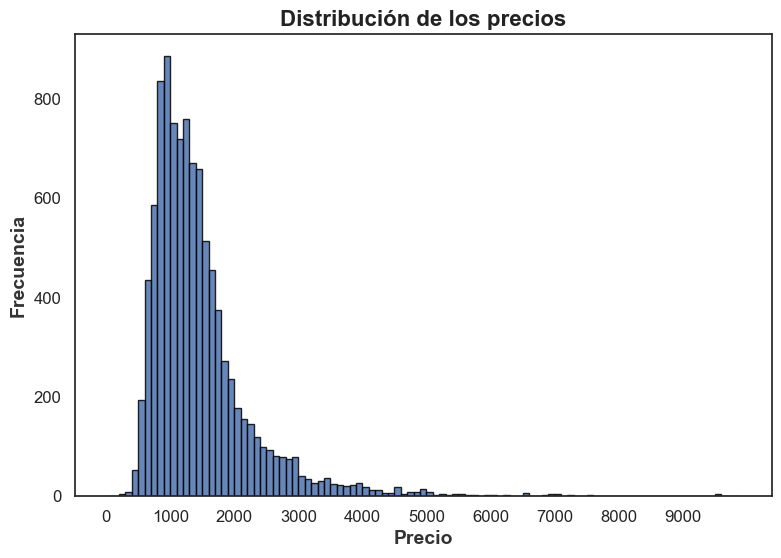

Media:  1486.2775
Mediana:  1270.0
Moda:  1350
Desviacion estandar:  1076.507967566508
Varianza:  1158869.4042341735
0


In [ ]:
#Histograma
plt.figure(figsize=(9, 6))
bins = np.arange(0, 10000, 100)
plt.hist(df['price'], bins=bins, edgecolor='black', color="#4C72B0", alpha=0.85, rwidth=1)
plt.xlabel('Precio', fontsize=14, fontweight='bold', color="#333333")
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold', color="#333333")
plt.title('Distribución de los precios', fontsize=16, fontweight='bold', color="#222222")
plt.xticks(np.arange(0, 10000, 1000), fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

#Estadisticas descriptivas
price = [i for i in df['price'] if False == pd.isna(i)]
print("Media: ", st.mean(price))
print("Mediana: ", st.median(price))
print("Moda: ", st.mode(price))

print("Desviacion estandar: ", st.stdev(price))
print("Varianza: ", st.variance(price))
print("Vacios: ", df['price'].isnull().sum())

square feet

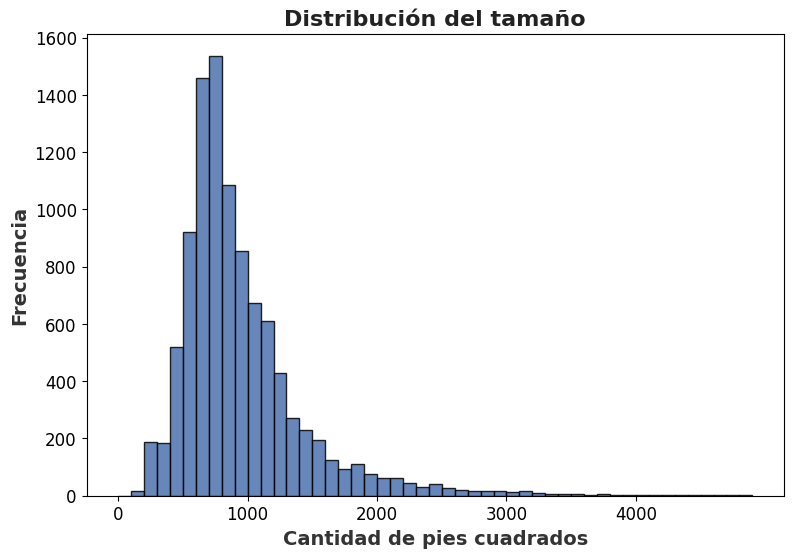

Media:  945.8105
Mediana:  802.0
Moda:  700
Desviacion estandar:  655.7557357341565
Varianza:  430015.5849482448
Vacios:  0


In [4]:
#Histograma
plt.figure(figsize=(9, 6))
bins = np.arange(0, 5000, 100)
plt.hist(df['square_feet'], bins=bins, edgecolor='black', color="#4C72B0", alpha=0.85, rwidth=1)
plt.xlabel('Cantidad de pies cuadrados', fontsize=14, fontweight='bold', color="#333333")
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold', color="#333333")
plt.title('Distribución del tamaño', fontsize=16, fontweight='bold', color="#222222")
plt.xticks(np.arange(0, 5000, 1000), fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

#Estadisticas descriptivas
tamaño = [i for i in df['square_feet'] if False == pd.isna(i)]
print("Media: ", st.mean(tamaño))
print("Mediana: ", st.median(tamaño))
print("Moda: ", st.mode(tamaño))

print("Desviacion estandar: ", st.stdev(tamaño))
print("Varianza: ", st.variance(tamaño))
print("Vacios: ", df['square_feet'].isnull().sum())

cityname, state, latitude y longitude

Elementos vacios en cityname:  77
Elementos vacios en state:  77
Elementos vacios en latitude:  10
Elementos vacios en longitude:  10


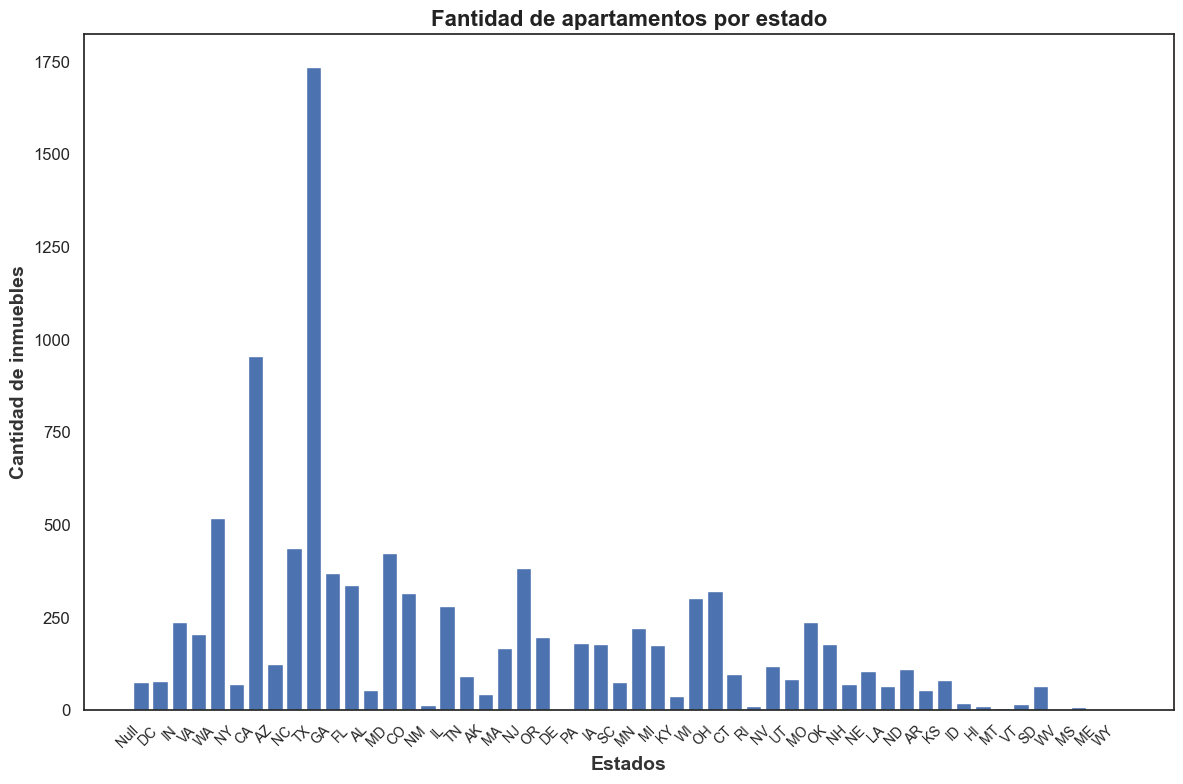

In [17]:
print("Elementos vacios en cityname: ", df['cityname'].isnull().sum())
print("Elementos vacios en state: ",(df['state'].isnull().sum()))
print("Elementos vacios en latitude: ", df['latitude'].isnull().sum())
print("Elementos vacios en longitude: ",df['longitude'].isnull().sum())



cities_cat = df['state'].explode().str.strip().drop_duplicates().tolist()
cities_dic = {}
cities_dic["Null"] = df['state'].isnull().sum()

cityname = [i for i in df['state'] if False == pd.isna(i)]

for j in cities_cat:
    count =0
    if pd.isna(j):
      continue  
    for i in cityname:
        if j == i:
            count+=1
    cities_dic[j] = count
    

plt.figure(figsize=(12, 8))
plt.bar(list(cities_dic.keys()), list(cities_dic.values()))
plt.xlabel('Estados', fontsize=14, fontweight='bold', color="#333333")
plt.ylabel('Cantidad de inmuebles', fontsize=14, fontweight='bold', color="#333333")
plt.title("Fantidad de apartamentos por estado", fontsize=16, fontweight='bold', color="#222222")
plt.xticks( rotation=45,ha='right',fontsize=10) 
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()